Hidden states at each time step:

t=0 | input= 0.497 | hidden=[-0.22620496 -0.22729435  0.11961073 -0.73994299]
t=1 | input=-0.138 | hidden=[0.22450318 0.73206885 0.12722369 0.5252037 ]
t=2 | input= 0.648 | hidden=[-0.78675042 -0.89986682 -0.70748914 -0.89612481]
t=3 | input= 1.523 | hidden=[ 0.92049008  0.41475985  0.95477728 -0.93024103]
t=4 | input=-0.234 | hidden=[-0.99476886  0.28842976 -0.83619125 -0.63976946]
t=5 | input=-0.234 | hidden=[ 0.98041279 -0.44315473 -0.14939723  0.98335344]
t=6 | input= 1.579 | hidden=[-0.93707019 -0.8938662   0.85382603 -0.99975979]
t=7 | input= 0.767 | hidden=[ 0.52584352  0.996894    0.67520143 -0.73832953]
t=8 | input=-0.469 | hidden=[-0.97405322 -0.47028953 -0.96015369  0.44410971]
t=9 | input= 0.543 | hidden=[ 0.9927075  -0.20844815  0.86364148  0.33950609]


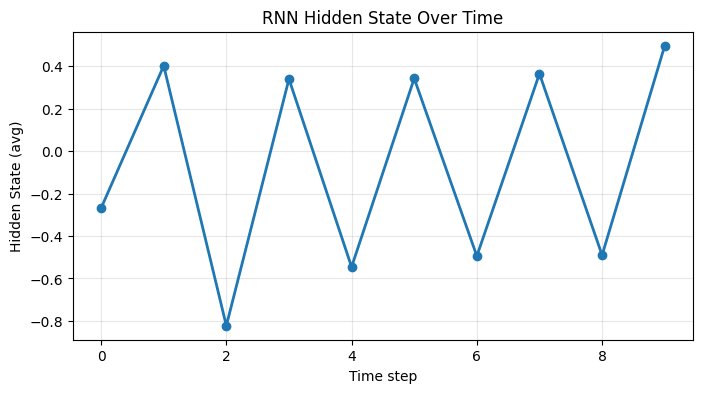

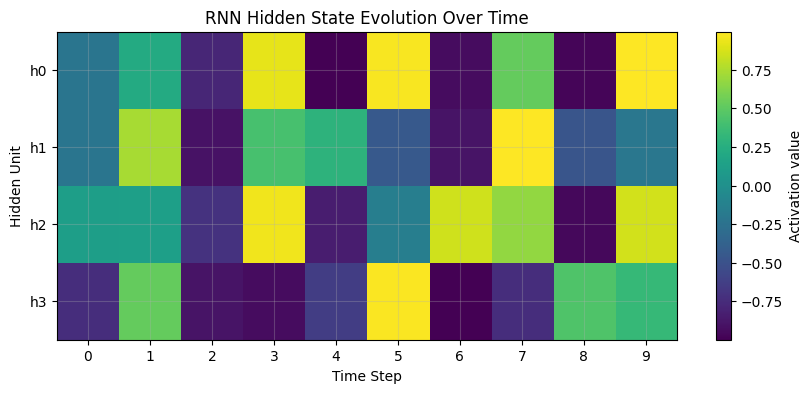

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Toy Sequential Data
np.random.seed(42)

time_steps = 10
input_size = 1
hidden_size = 4

X = np.random.randn(time_steps, input_size)

# 2. RNN Parameters
Wx = np.random.randn(hidden_size, input_size)
Wh = np.random.randn(hidden_size, hidden_size)
b = np.zeros((hidden_size, 1))

# 3. RNN Forward Pass
h_prev = np.zeros((hidden_size, 1))
hidden_states = []

print("Hidden states at each time step:\n")

for t in range(time_steps):
    x_t = X[t].reshape(-1,1)
    h_t = np.tanh(Wx @ x_t + Wh @ h_prev + b)

    hidden_states.append(h_t.flatten())

    print(f"t={t} | input={x_t.flatten()[0]: .3f} | hidden={h_t.flatten()}")

    h_prev = h_t

H = np.array(hidden_states).T # shape: (hidden_size, time_steps)

# 4. visualization 1: Single Hidden Unit Avg
plt.figure(figsize=(8,4))
plt.plot(range(time_steps), H.mean(axis=0), marker="o", linewidth=2)
plt.xlabel("Time step")
plt.ylabel("Hidden State (avg)")
plt.title("RNN Hidden State Over Time")
plt.grid(alpha=0.3)
plt.show()

# 5. visualization 2: Full Hidden State Matrix
plt.figure(figsize=(10, 4))
plt.imshow(H, aspect="auto", cmap="viridis")
plt.colorbar(label="Activation value")

plt.xlabel("Time Step")
plt.ylabel("Hidden Unit")
plt.title("RNN Hidden State Evolution Over Time")

plt.xticks(range(time_steps))
plt.yticks(range(hidden_size), [f"h{i}" for i in range(hidden_size)])
plt.grid(alpha=0.3)

plt.show()